# Trading Strategies powered by Machine Learning - Classification

## Getting and Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
import pickle as pkl
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
# pd.set_option('display.max_rows', None)

In [7]:
df = pd.read_pickle("datasets/eur_usd_transformed.pkl")
Z_train = pd.read_pickle("datasets/Z_train.pkl")
Z_test = pd.read_pickle("datasets/Z_test.pkl")
train = pd.read_pickle("datasets/train.pkl")
test = pd.read_pickle("datasets/test.pkl")
params = pkl.load(open("datasets/params.pkl", "rb"))
mu = params["mu"]
std = params["std"]
cols = pkl.load(open("datasets/cols.pkl", "rb"))

In [9]:
train["dir"] = np.sign(train.returns)
test["dir"] = np.sign(test.returns)
df["dir"] = np.sign(df.returns)



In [10]:
df

,close,returns,dir,sma,bol1,bol2,min,max,mom,vol,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,bol1_lag_1,bol1_lag_2,bol1_lag_3,bol1_lag_4,bol1_lag_5,bol2_lag_1,bol2_lag_2,bol2_lag_3,bol2_lag_4,bol2_lag_5,min_lag_1,min_lag_2,min_lag_3,min_lag_4,min_lag_5,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-01 04:30:00,1.19936,0.000208,1.0,0.001828,1.200007,1.198125,-0.001893,0.000183,0.000022,0.000410,0.0,0.0,0.0,1.0,1.0,0.001834,0.001837,0.001831,0.001830,0.001819,1.200197,1.200351,1.200458,1.200514,1.200565,1.197753,1.197427,1.197126,1.196878,1.196603,-0.001693,-0.001918,-0.002035,-0.002109,-0.002318,0.000392,0.000267,0.000250,0.000175,0.000183,-0.000072,-2.779376e-05,1.167572e-04,1.139682e-04,1.084088e-04,0.000409,0.000407,0.000407,0.000408,0.000424
2020-09-01 04:35:00,1.19911,-0.000208,-1.0,0.001814,1.199603,1.198691,-0.000284,0.000392,-0.000042,0.000414,1.0,0.0,0.0,0.0,1.0,0.001828,0.001834,0.001837,0.001831,0.001830,1.200007,1.200197,1.200351,1.200458,1.200514,1.198125,1.197753,1.197427,1.197126,1.196878,-0.001893,-0.001693,-0.001918,-0.002035,-0.002109,0.000183,0.000392,0.000267,0.000250,0.000175,0.000022,-7.226799e-05,-2.779376e-05,1.167572e-04,1.139682e-04,0.000410,0.000409,0.000407,0.000407,0.000408
2020-09-01 04:40:00,1.19912,0.000008,1.0,0.001714,1.199595,1.198688,-0.000292,0.000384,0.000003,0.000199,0.0,1.0,0.0,0.0,0.0,0.001814,0.001828,0.001834,0.001837,0.001831,1.199603,1.200007,1.200197,1.200351,1.200458,1.198691,1.198125,1.197753,1.197427,1.197126,-0.000284,-0.001893,-0.001693,-0.001918,-0.002035,0.000392,0.000183,0.000392,0.000267,0.000250,-0.000042,2.223482e-05,-7.226799e-05,-2.779376e-05,1.167572e-04,0.000414,0.000410,0.000409,0.000407,0.000407
2020-09-01 04:45:00,1.19898,-0.000117,-1.0,0.001609,1.199583,1.198675,-0.000175,0.000500,-0.000106,0.000200,1.0,0.0,1.0,0.0,0.0,0.001714,0.001814,0.001828,0.001834,0.001837,1.199595,1.199603,1.200007,1.200197,1.200351,1.198688,1.198691,1.198125,1.197753,1.197427,-0.000292,-0.000284,-0.001893,-0.001693,-0.001918,0.000384,0.000392,0.000183,0.000392,0.000267,0.000003,-4.169498e-05,2.223482e-05,-7.226799e-05,-2.779376e-05,0.000199,0.000414,0.000410,0.000409,0.000407
2020-09-01 04:50:00,1.19894,-0.000033,-1.0,0.001513,1.199578,1.198688,-0.000142,0.000534,-0.000047,0.000186,0.0,1.0,0.0,1.0,0.0,0.001609,0.001714,0.001814,0.001828,0.001834,1.199583,1.199595,1.199603,1.200007,1.200197,1.198675,1.198688,1.198691,1.198125,1.197753,-0.000175,-0.000292,-0.000284,-0.001893,-0.001693,0.000500,0.000384,0.000392,0.000183,0.000392,-0.000106,2.779828e-06,-4.169498e-05,2.223482e-05,-7.226799e-05,0.000200,0.000199,0.000414,0.000410,0.000409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 23:35:00,1.00218,-0.000140,-1.0,0.000041,1.002333,1.001435,-0.000649,0.000140,0.000013,0.000118,1.0,1.0,1.0,0.0,1.0,0.000017,-0.000015,-0.000052,-0.000090,-0.000131,1.002304,1.002242,1.002202,1.002165,1.002137,1.001421,1.001429,1.001425,1.001419,1.001394,-0.000788,-0.000649,-0.000609,-0.000579,-0.000718,0.000000,0.000000,0.000040,0.000070,0.000000,0.000070,-4.856322e-18,2.328432e-05,7.651402e-05,1.530349e-04,0.000113,0.000111,0.000111,0.000113,0.000113
2022-08-30 23:40:00,1.00244,0.000259,1.0,0.000066,1.002406,1.001426,-0.000908,0.000000,0.000086,0.000127,0.0,1.0,1.0,1.0,0.0,0.000041,0.000017,-0.000015,-0.000052,-0.000090,1.002333,1.002304,1.002242,1.002202,1.002165,1.001435,1.001421,1.001429,1.001425,1.001419,-0.000649,-0.000788,-0.000649,-0.000609,-0.000579,0.000140,0.000000,0.000000,0.000040,0.000070,0.000013,6.984529e-05,-4.856322e-18,2.328432e-05,7.651402e-05,0.000118,0.000113,0.000111,0.000111,0.000113
2022-08-30 23:45:00,1.

In [11]:
# defining our Y

ptc = 0.00005  #price to cost ratio this factors in the minumum the direction must go in order for it to be a buy or a sell

conditions = [
    (df['dir'] == -1) & (abs(df['returns']) > ptc),
    (abs(df['returns'] <= ptc)), 
    (df['dir'] == 1) & (abs(df['returns']) > ptc),
    ]
                        
                        

choices = [
    [-1], 
    [0], 
    [1]
]

df['dir_class'] = np.select(conditions, choices)


df

,close,returns,dir,sma,bol1,bol2,min,max,mom,vol,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,bol1_lag_1,bol1_lag_2,bol1_lag_3,bol1_lag_4,bol1_lag_5,bol2_lag_1,bol2_lag_2,bol2_lag_3,bol2_lag_4,bol2_lag_5,min_lag_1,min_lag_2,min_lag_3,min_lag_4,min_lag_5,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,dir_class
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-01 04:30:00,1.19936,0.000208,1.0,0.001828,1.200007,1.198125,-0.001893,0.000183,0.000022,0.000410,0.0,0.0,0.0,1.0,1.0,0.001834,0.001837,0.001831,0.001830,0.001819,1.200197,1.200351,1.200458,1.200514,1.200565,1.197753,1.197427,1.197126,1.196878,1.196603,-0.001693,-0.001918,-0.002035,-0.002109,-0.002318,0.000392,0.000267,0.000250,0.000175,0.000183,-0.000072,-2.779376e-05,1.167572e-04,1.139682e-04,1.084088e-04,0.000409,0.000407,0.000407,0.000408,0.000424,1
2020-09-01 04:35:00,1.19911,-0.000208,-1.0,0.001814,1.199603,1.198691,-0.000284,0.000392,-0.000042,0.000414,1.0,0.0,0.0,0.0,1.0,0.001828,0.001834,0.001837,0.001831,0.001830,1.200007,1.200197,1.200351,1.200458,1.200514,1.198125,1.197753,1.197427,1.197126,1.196878,-0.001893,-0.001693,-0.001918,-0.002035,-0.002109,0.000183,0.000392,0.000267,0.000250,0.000175,0.000022,-7.226799e-05,-2.779376e-05,1.167572e-04,1.139682e-04,0.000410,0.000409,0.000407,0.000407,0.000408,-1
2020-09-01 04:40:00,1.19912,0.000008,1.0,0.001714,1.199595,1.198688,-0.000292,0.000384,0.000003,0.000199,0.0,1.0,0.0,0.0,0.0,0.001814,0.001828,0.001834,0.001837,0.001831,1.199603,1.200007,1.200197,1.200351,1.200458,1.198691,1.198125,1.197753,1.197427,1.197126,-0.000284,-0.001893,-0.001693,-0.001918,-0.002035,0.000392,0.000183,0.000392,0.000267,0.000250,-0.000042,2.223482e-05,-7.226799e-05,-2.779376e-05,1.167572e-04,0.000414,0.000410,0.000409,0.000407,0.000407,0
2020-09-01 04:45:00,1.19898,-0.000117,-1.0,0.001609,1.199583,1.198675,-0.000175,0.000500,-0.000106,0.000200,1.0,0.0,1.0,0.0,0.0,0.001714,0.001814,0.001828,0.001834,0.001837,1.199595,1.199603,1.200007,1.200197,1.200351,1.198688,1.198691,1.198125,1.197753,1.197427,-0.000292,-0.000284,-0.001893,-0.001693,-0.001918,0.000384,0.000392,0.000183,0.000392,0.000267,0.000003,-4.169498e-05,2.223482e-05,-7.226799e-05,-2.779376e-05,0.000199,0.000414,0.000410,0.000409,0.000407,-1
2020-09-01 04:50:00,1.19894,-0.000033,-1.0,0.001513,1.199578,1.198688,-0.000142,0.000534,-0.000047,0.000186,0.0,1.0,0.0,1.0,0.0,0.001609,0.001714,0.001814,0.001828,0.001834,1.199583,1.199595,1.199603,1.200007,1.200197,1.198675,1.198688,1.198691,1.198125,1.197753,-0.000175,-0.000292,-0.000284,-0.001893,-0.001693,0.000500,0.000384,0.000392,0.000183,0.000392,-0.000106,2.779828e-06,-4.169498e-05,2.223482e-05,-7.226799e-05,0.000200,0.000199,0.000414,0.000410,0.000409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 23:35:00,1.00218,-0.000140,-1.0,0.000041,1.002333,1.001435,-0.000649,0.000140,0.000013,0.000118,1.0,1.0,1.0,0.0,1.0,0.000017,-0.000015,-0.000052,-0.000090,-0.000131,1.002304,1.002242,1.002202,1.002165,1.002137,1.001421,1.001429,1.001425,1.001419,1.001394,-0.000788,-0.000649,-0.000609,-0.000579,-0.000718,0.000000,0.000000,0.000040,0.000070,0.000000,0.000070,-4.856322e-18,2.328432e-05,7.651402e-05,1.530349e-04,0.000113,0.000111,0.000111,0.000113,0.000113,-1
2022-08-30 23:40:00,1.00244,0.000259,1.0,0.000066,1.002406,1.001426,-0.000908,0.000000,0.000086,0.000127,0.0,1.0,1.0,1.0,0.0,0.000041,0.000017,-0.000015,-0.000052,-0.000090,1.002333,1.002304,1.002242,1.002202,1.002165,1.001435,1.001421,1.001429,1.001425,1.001419,-0.000649,-0.000788,-0.000649,-0.000609,-0.000579,0.000140,0.000000,0.000000,0.000040,0.000070,0.000013,6.984529e-05,-4.856322e-18,2.328432e-05,7.651402e-05,0.000118,0.000113,0.000111,0.000111,0

<AxesSubplot:xlabel='dir_class', ylabel='count'>

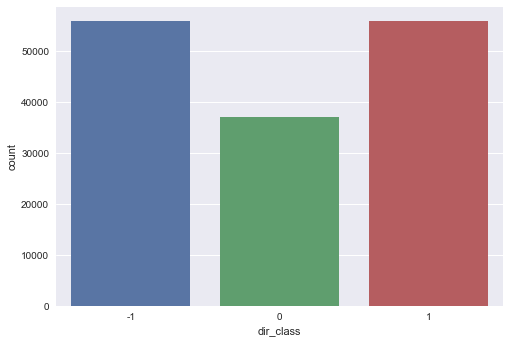

In [12]:
sns.countplot(x=df['dir_class'])

In [13]:
df.dir_class.value_counts()

-1    55942
 1    55874
 0    37004
Name: dir_class, dtype: int64

# Train Test Split

In [14]:
split = int(len(df)*0.7)
split

train = df.iloc[:split].copy()
test = df.iloc[split:].copy()

In [15]:
#defining X and Y train test

X_train = train[cols]
y_train = train[['dir_class']]

X_test = test[cols]
y_test = test[['dir_class']]

In [16]:
mu, std = X_train.mean(), X_train.std() # train set parameters (mu--> mean, std ---> std deviation) for standardization
z_train = (X_train - mu) / std # standardization of train set features
z_train = z_train[cols]
z_test = (X_test - mu) / std
z_test = z_test[cols]

In [17]:
y_train.value_counts()

dir_class
 1           37917
-1           37599
 0           28658
dtype: int64

## Predicting Market Direction with Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression(class_weight = 'balanced')

parameters = [{'penalty':['none','l1','l2']}, 
              {'max_iter':['1e3','1e4','1e5','1e6']},
              {'multi_class' : ['ovr', 'multinomial']},
              {'C':[ 1000,1e5, 1e6]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs=-1,
                           verbose=0)


grid_search.fit(z_train, y_train)   

C:\Users\wei_hao\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wei_hao\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wei_hao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\wei_hao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueErro

GridSearchCV(cv=2, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'penalty': ['none', 'l1', 'l2']},
                         {'max_iter': ['1e3', '1e4', '1e5', '1e6']},
                         {'multi_class': ['ovr', 'multinomial']},
                         {'C': [1000, 100000.0, 1000000.0]}],
             scoring='accuracy')

In [20]:
pkl.dump(grid_search, open('datasets/logreg.pkl', 'wb'))

In [21]:
logreg = pkl.load(open('datasets/logreg.pkl', 'rb'))

In [22]:
print(f" best estimator = {logreg.best_estimator_} \n Accuracy = {logreg.best_score_} \n Best param = {logreg.best_params_}")

 best estimator = LogisticRegression(C=1000, class_weight='balanced') 
 Accuracy = 0.39658648031178606 
 Best param = {'C': 1000}


In [23]:
train["pred"] = logreg.predict(z_train)

In [24]:
train

,close,returns,dir,sma,bol1,bol2,min,max,mom,vol,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,bol1_lag_1,bol1_lag_2,bol1_lag_3,bol1_lag_4,bol1_lag_5,bol2_lag_1,bol2_lag_2,bol2_lag_3,bol2_lag_4,bol2_lag_5,min_lag_1,min_lag_2,min_lag_3,min_lag_4,min_lag_5,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,dir_class,pred
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-01 04:30:00,1.19936,0.000208,1.0,0.001828,1.200007,1.198125,-0.001893,0.000183,0.000022,0.000410,0.0,0.0,0.0,1.0,1.0,0.001834,0.001837,0.001831,0.001830,0.001819,1.200197,1.200351,1.200458,1.200514,1.200565,1.197753,1.197427,1.197126,1.196878,1.196603,-0.001693,-0.001918,-0.002035,-0.002109,-0.002318,0.000392,0.000267,0.000250,0.000175,0.000183,-0.000072,-0.000028,0.000117,0.000114,0.000108,0.000409,0.000407,0.000407,0.000408,0.000424,1,1
2020-09-01 04:35:00,1.19911,-0.000208,-1.0,0.001814,1.199603,1.198691,-0.000284,0.000392,-0.000042,0.000414,1.0,0.0,0.0,0.0,1.0,0.001828,0.001834,0.001837,0.001831,0.001830,1.200007,1.200197,1.200351,1.200458,1.200514,1.198125,1.197753,1.197427,1.197126,1.196878,-0.001893,-0.001693,-0.001918,-0.002035,-0.002109,0.000183,0.000392,0.000267,0.000250,0.000175,0.000022,-0.000072,-0.000028,0.000117,0.000114,0.000410,0.000409,0.000407,0.000407,0.000408,-1,-1
2020-09-01 04:40:00,1.19912,0.000008,1.0,0.001714,1.199595,1.198688,-0.000292,0.000384,0.000003,0.000199,0.0,1.0,0.0,0.0,0.0,0.001814,0.001828,0.001834,0.001837,0.001831,1.199603,1.200007,1.200197,1.200351,1.200458,1.198691,1.198125,1.197753,1.197427,1.197126,-0.000284,-0.001893,-0.001693,-0.001918,-0.002035,0.000392,0.000183,0.000392,0.000267,0.000250,-0.000042,0.000022,-0.000072,-0.000028,0.000117,0.000414,0.000410,0.000409,0.000407,0.000407,0,1
2020-09-01 04:45:00,1.19898,-0.000117,-1.0,0.001609,1.199583,1.198675,-0.000175,0.000500,-0.000106,0.000200,1.0,0.0,1.0,0.0,0.0,0.001714,0.001814,0.001828,0.001834,0.001837,1.199595,1.199603,1.200007,1.200197,1.200351,1.198688,1.198691,1.198125,1.197753,1.197427,-0.000292,-0.000284,-0.001893,-0.001693,-0.001918,0.000384,0.000392,0.000183,0.000392,0.000267,0.000003,-0.000042,0.000022,-0.000072,-0.000028,0.000199,0.000414,0.000410,0.000409,0.000407,-1,0
2020-09-01 04:50:00,1.19894,-0.000033,-1.0,0.001513,1.199578,1.198688,-0.000142,0.000534,-0.000047,0.000186,0.0,1.0,0.0,1.0,0.0,0.001609,0.001714,0.001814,0.001828,0.001834,1.199583,1.199595,1.199603,1.200007,1.200197,1.198675,1.198688,1.198691,1.198125,1.197753,-0.000175,-0.000292,-0.000284,-0.001893,-0.001693,0.000500,0.000384,0.000392,0.000183,0.000392,-0.000106,0.000003,-0.000042,0.000022,-0.000072,0.000200,0.000199,0.000414,0.000410,0.000409,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 15:05:00,1.12708,-0.000035,-1.0,-0.000085,1.127965,1.126686,-0.000266,0.000834,-0.000169,0.000261,0.0,0.0,0.0,1.0,1.0,-0.000101,-0.000142,-0.000164,-0.000185,-0.000210,1.127964,1.127982,1.127973,1.127956,1.127908,1.126692,1.126648,1.126644,1.126648,1.126666,-0.000302,-0.000585,-0.000772,-0.000922,-0.000603,0.000798,0.000514,0.000328,0.000177,0.000497,-0.000207,-0.000006,0.000109,0.000269,0.000160,0.000268,0.000277,0.000277,0.000275,0.000274,0,1
2022-01-25 15:10:00,1.12749,0.000364,1.0,-0.000061,1.127977,1.126695,-0.000630,0.000470,0.000015,0.000271,0.0,0.0,0.0,0.0,1.0,-0.000085,-0.000101,-0.000142,-0.000164,-0.000185,1.127965,1.127964,1.127982,1.127973,1.127956,1.126686,1.126692,1.126648,1.126644,1.126648,-0.000266,-0.000302,-0.000585,-0.000772,-0.000922,0.000834,0.000798,0.000514,0.000328,0.000177,-0.000169,-0.000207,-0.000006,0.000109,0.000269,0.000261,0.000268,0.000277,0.000277,0.000275,1,1
2022-01-25 15:15:00,1.12724,-0.000222,-1.0,-0.000022,1.127954,1.12675

In [25]:
train.pred.value_counts()

 0    52959
 1    25994
-1    25221
Name: pred, dtype: int64

In [26]:
cm = confusion_matrix(y_train, train.pred)
print('Confusion Matrix\n')
print(cm)



print('\nAccuracy: {:.4f}\n'.format(logreg.best_score_))

print('Micro Precision: {:.4f}'.format(precision_score(y_train, train.pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_train, train.pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_train, train.pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_train, train.pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_train, train.pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_train, train.pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_train, train.pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_train, train.pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_train, train.pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, train.pred, target_names=['Sell', 'Hold', 'Buy']))

Confusion Matrix

[[10806 16661 10132]
 [ 4620 19514  4524]
 [ 9795 16784 11338]]

Accuracy: 0.3966

Micro Precision: 0.3999
Micro Recall: 0.3999
Micro F1-score: 0.3999

Macro Precision: 0.4110
Macro Recall: 0.4224
Macro F1-score: 0.3923

Weighted Precision: 0.4148
Weighted Recall: 0.3999
Weighted F1-score: 0.3849

Classification Report

              precision    recall  f1-score   support

        Sell       0.43      0.29      0.34     37599
        Hold       0.37      0.68      0.48     28658
         Buy       0.44      0.30      0.35     37917

    accuracy                           0.40    104174
   macro avg       0.41      0.42      0.39    104174
weighted avg       0.41      0.40      0.38    104174



In [27]:
y_train.dir_class.value_counts()

 1    37917
-1    37599
 0    28658
Name: dir_class, dtype: int64

In [28]:
accuracy_score(y_true = y_train.dir_class, y_pred = train.pred)

0.39988864783919215

In [29]:
test["pred"] = logreg.predict(z_test)
y_pred = test["pred"]

In [30]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(cm)



print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Sell', 'Hold', 'Buy']))

Confusion Matrix

[[8573 1594 8176]
 [3283 1822 3241]
 [7818 1618 8521]]

Accuracy: 0.4237

Micro Precision: 0.4237
Micro Recall: 0.4237
Micro F1-score: 0.4237

Macro Precision: 0.4084
Macro Recall: 0.3867
Macro F1-score: 0.3910

Weighted Precision: 0.4186
Weighted Recall: 0.4237
Weighted F1-score: 0.4171

Classification Report

              precision    recall  f1-score   support

        Sell       0.44      0.47      0.45     18343
        Hold       0.36      0.22      0.27      8346
         Buy       0.43      0.47      0.45     17957

    accuracy                           0.42     44646
   macro avg       0.41      0.39      0.39     44646
weighted avg       0.42      0.42      0.42     44646



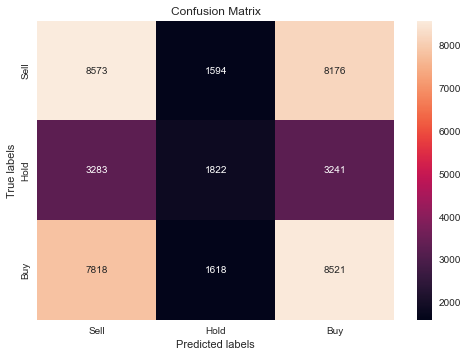

In [31]:
# Plotting the confusion matrix

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Sell','Hold','Buy']); ax.yaxis.set_ticklabels(['Sell','Hold','Buy']);

 Train Accuracy = 0.3966  
 Test Accuracy  = 0.4237  
 % diff = 6.83%

## In-Sample Backtesting and the Look-ahead-bias  
  
Test data prediction analysis

In [32]:
train["strategy"] = train.pred * train.returns

In [33]:
train["creturns"] = train["returns"].cumsum().apply(np.exp)
train["cstrategy"] = train["strategy"].cumsum().apply(np.exp)

In [34]:
train

,close,returns,dir,sma,bol1,bol2,min,max,mom,vol,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,bol1_lag_1,bol1_lag_2,bol1_lag_3,bol1_lag_4,bol1_lag_5,bol2_lag_1,bol2_lag_2,bol2_lag_3,bol2_lag_4,bol2_lag_5,min_lag_1,min_lag_2,min_lag_3,min_lag_4,min_lag_5,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,dir_class,pred,strategy,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-01 04:30:00,1.19936,0.000208,1.0,0.001828,1.200007,1.198125,-0.001893,0.000183,0.000022,0.000410,0.0,0.0,0.0,1.0,1.0,0.001834,0.001837,0.001831,0.001830,0.001819,1.200197,1.200351,1.200458,1.200514,1.200565,1.197753,1.197427,1.197126,1.196878,1.196603,-0.001693,-0.001918,-0.002035,-0.002109,-0.002318,0.000392,0.000267,0.000250,0.000175,0.000183,-0.000072,-0.000028,0.000117,0.000114,0.000108,0.000409,0.000407,0.000407,0.000408,0.000424,1,1,0.000208,1.000208,1.000208
2020-09-01 04:35:00,1.19911,-0.000208,-1.0,0.001814,1.199603,1.198691,-0.000284,0.000392,-0.000042,0.000414,1.0,0.0,0.0,0.0,1.0,0.001828,0.001834,0.001837,0.001831,0.001830,1.200007,1.200197,1.200351,1.200458,1.200514,1.198125,1.197753,1.197427,1.197126,1.196878,-0.001893,-0.001693,-0.001918,-0.002035,-0.002109,0.000183,0.000392,0.000267,0.000250,0.000175,0.000022,-0.000072,-0.000028,0.000117,0.000114,0.000410,0.000409,0.000407,0.000407,0.000408,-1,-1,0.000208,1.000000,1.000417
2020-09-01 04:40:00,1.19912,0.000008,1.0,0.001714,1.199595,1.198688,-0.000292,0.000384,0.000003,0.000199,0.0,1.0,0.0,0.0,0.0,0.001814,0.001828,0.001834,0.001837,0.001831,1.199603,1.200007,1.200197,1.200351,1.200458,1.198691,1.198125,1.197753,1.197427,1.197126,-0.000284,-0.001893,-0.001693,-0.001918,-0.002035,0.000392,0.000183,0.000392,0.000267,0.000250,-0.000042,0.000022,-0.000072,-0.000028,0.000117,0.000414,0.000410,0.000409,0.000407,0.000407,0,1,0.000008,1.000008,1.000425
2020-09-01 04:45:00,1.19898,-0.000117,-1.0,0.001609,1.199583,1.198675,-0.000175,0.000500,-0.000106,0.000200,1.0,0.0,1.0,0.0,0.0,0.001714,0.001814,0.001828,0.001834,0.001837,1.199595,1.199603,1.200007,1.200197,1.200351,1.198688,1.198691,1.198125,1.197753,1.197427,-0.000292,-0.000284,-0.001893,-0.001693,-0.001918,0.000384,0.000392,0.000183,0.000392,0.000267,0.000003,-0.000042,0.000022,-0.000072,-0.000028,0.000199,0.000414,0.000410,0.000409,0.000407,-1,0,-0.000000,0.999892,1.000425
2020-09-01 04:50:00,1.19894,-0.000033,-1.0,0.001513,1.199578,1.198688,-0.000142,0.000534,-0.000047,0.000186,0.0,1.0,0.0,1.0,0.0,0.001609,0.001714,0.001814,0.001828,0.001834,1.199583,1.199595,1.199603,1.200007,1.200197,1.198675,1.198688,1.198691,1.198125,1.197753,-0.000175,-0.000292,-0.000284,-0.001893,-0.001693,0.000500,0.000384,0.000392,0.000183,0.000392,-0.000106,0.000003,-0.000042,0.000022,-0.000072,0.000200,0.000199,0.000414,0.000410,0.000409,0,0,-0.000000,0.999858,1.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 15:05:00,1.12708,-0.000035,-1.0,-0.000085,1.127965,1.126686,-0.000266,0.000834,-0.000169,0.000261,0.0,0.0,0.0,1.0,1.0,-0.000101,-0.000142,-0.000164,-0.000185,-0.000210,1.127964,1.127982,1.127973,1.127956,1.127908,1.126692,1.126648,1.126644,1.126648,1.126666,-0.000302,-0.000585,-0.000772,-0.000922,-0.000603,0.000798,0.000514,0.000328,0.000177,0.000497,-0.000207,-0.000006,0.000109,0.000269,0.000160,0.000268,0.000277,0.000277,0.000275,0.000274,0,1,-0.000035,0.939930,1.621628
2022-01-25 15:10:00,1.12749,0.000364,1.0,-0.000061,1.127977,1.126695,-0.000630,0.000470,0.000015,0.000271,0.0,0.0,0.0,0.0,1.0,-0.000085,-0.000101,-0.000142,-0.000164,-0.000185,1.127965,1.127964,1.127982,1.127973,1.127956,1.126686,1.126692,1.126648,1.126644,1.126648,-0.000266,-0.000302,-0.000585,-0.000772,-0.000922,0.0

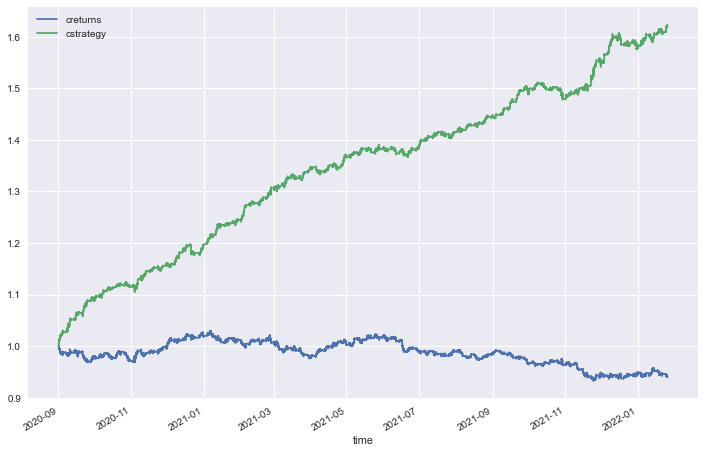

In [35]:
train[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [36]:
train

,close,returns,dir,sma,bol1,bol2,min,max,mom,vol,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,bol1_lag_1,bol1_lag_2,bol1_lag_3,bol1_lag_4,bol1_lag_5,bol2_lag_1,bol2_lag_2,bol2_lag_3,bol2_lag_4,bol2_lag_5,min_lag_1,min_lag_2,min_lag_3,min_lag_4,min_lag_5,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,dir_class,pred,strategy,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-01 04:30:00,1.19936,0.000208,1.0,0.001828,1.200007,1.198125,-0.001893,0.000183,0.000022,0.000410,0.0,0.0,0.0,1.0,1.0,0.001834,0.001837,0.001831,0.001830,0.001819,1.200197,1.200351,1.200458,1.200514,1.200565,1.197753,1.197427,1.197126,1.196878,1.196603,-0.001693,-0.001918,-0.002035,-0.002109,-0.002318,0.000392,0.000267,0.000250,0.000175,0.000183,-0.000072,-0.000028,0.000117,0.000114,0.000108,0.000409,0.000407,0.000407,0.000408,0.000424,1,1,0.000208,1.000208,1.000208
2020-09-01 04:35:00,1.19911,-0.000208,-1.0,0.001814,1.199603,1.198691,-0.000284,0.000392,-0.000042,0.000414,1.0,0.0,0.0,0.0,1.0,0.001828,0.001834,0.001837,0.001831,0.001830,1.200007,1.200197,1.200351,1.200458,1.200514,1.198125,1.197753,1.197427,1.197126,1.196878,-0.001893,-0.001693,-0.001918,-0.002035,-0.002109,0.000183,0.000392,0.000267,0.000250,0.000175,0.000022,-0.000072,-0.000028,0.000117,0.000114,0.000410,0.000409,0.000407,0.000407,0.000408,-1,-1,0.000208,1.000000,1.000417
2020-09-01 04:40:00,1.19912,0.000008,1.0,0.001714,1.199595,1.198688,-0.000292,0.000384,0.000003,0.000199,0.0,1.0,0.0,0.0,0.0,0.001814,0.001828,0.001834,0.001837,0.001831,1.199603,1.200007,1.200197,1.200351,1.200458,1.198691,1.198125,1.197753,1.197427,1.197126,-0.000284,-0.001893,-0.001693,-0.001918,-0.002035,0.000392,0.000183,0.000392,0.000267,0.000250,-0.000042,0.000022,-0.000072,-0.000028,0.000117,0.000414,0.000410,0.000409,0.000407,0.000407,0,1,0.000008,1.000008,1.000425
2020-09-01 04:45:00,1.19898,-0.000117,-1.0,0.001609,1.199583,1.198675,-0.000175,0.000500,-0.000106,0.000200,1.0,0.0,1.0,0.0,0.0,0.001714,0.001814,0.001828,0.001834,0.001837,1.199595,1.199603,1.200007,1.200197,1.200351,1.198688,1.198691,1.198125,1.197753,1.197427,-0.000292,-0.000284,-0.001893,-0.001693,-0.001918,0.000384,0.000392,0.000183,0.000392,0.000267,0.000003,-0.000042,0.000022,-0.000072,-0.000028,0.000199,0.000414,0.000410,0.000409,0.000407,-1,0,-0.000000,0.999892,1.000425
2020-09-01 04:50:00,1.19894,-0.000033,-1.0,0.001513,1.199578,1.198688,-0.000142,0.000534,-0.000047,0.000186,0.0,1.0,0.0,1.0,0.0,0.001609,0.001714,0.001814,0.001828,0.001834,1.199583,1.199595,1.199603,1.200007,1.200197,1.198675,1.198688,1.198691,1.198125,1.197753,-0.000175,-0.000292,-0.000284,-0.001893,-0.001693,0.000500,0.000384,0.000392,0.000183,0.000392,-0.000106,0.000003,-0.000042,0.000022,-0.000072,0.000200,0.000199,0.000414,0.000410,0.000409,0,0,-0.000000,0.999858,1.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 15:05:00,1.12708,-0.000035,-1.0,-0.000085,1.127965,1.126686,-0.000266,0.000834,-0.000169,0.000261,0.0,0.0,0.0,1.0,1.0,-0.000101,-0.000142,-0.000164,-0.000185,-0.000210,1.127964,1.127982,1.127973,1.127956,1.127908,1.126692,1.126648,1.126644,1.126648,1.126666,-0.000302,-0.000585,-0.000772,-0.000922,-0.000603,0.000798,0.000514,0.000328,0.000177,0.000497,-0.000207,-0.000006,0.000109,0.000269,0.000160,0.000268,0.000277,0.000277,0.000275,0.000274,0,1,-0.000035,0.939930,1.621628
2022-01-25 15:10:00,1.12749,0.000364,1.0,-0.000061,1.127977,1.126695,-0.000630,0.000470,0.000015,0.000271,0.0,0.0,0.0,0.0,1.0,-0.000085,-0.000101,-0.000142,-0.000164,-0.000185,1.127965,1.127964,1.127982,1.127973,1.127956,1.126686,1.126692,1.126648,1.126644,1.126648,-0.000266,-0.000302,-0.000585,-0.000772,-0.000922,0.0

#### Factoring in a spread of 0.5 basis point

In [37]:
ptc = 0.00005

train["strategy_net"] = train.strategy - abs(train.pred) * ptc
train["cstrategy_net"] = train["strategy_net"].cumsum().apply(np.exp)

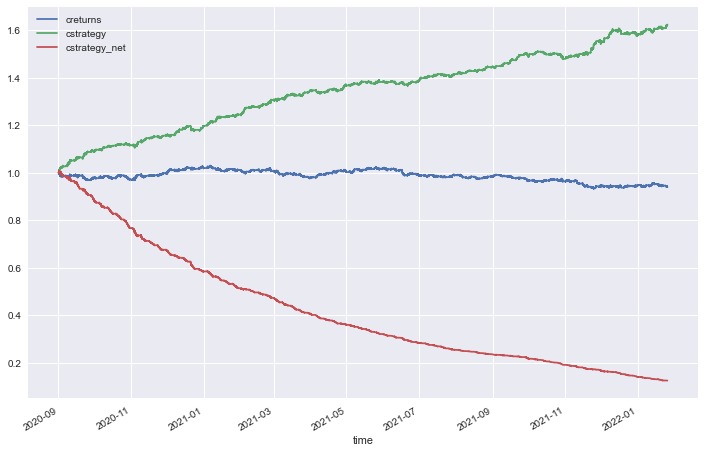

In [38]:
train[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

We can see that the effects of over trading can lead to massive losses due to trading costs.

## Out-Sample Forward Testing

In [39]:
test["strategy"] = test.pred * test.returns

In [40]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

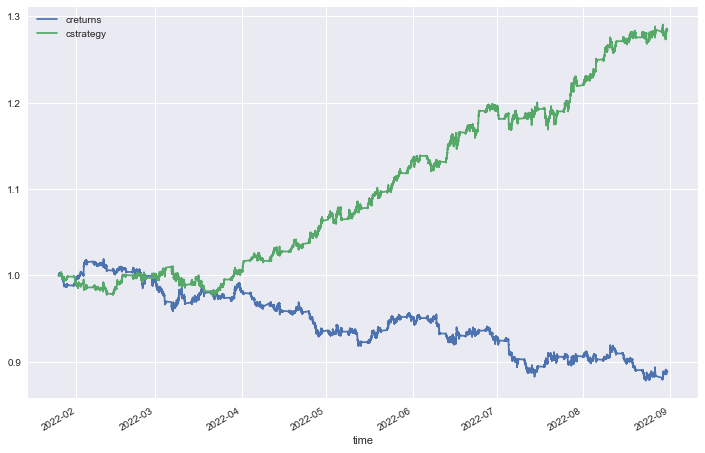

In [41]:
test[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [42]:
ptc = 0.00005
test["strategy_net"] = test.strategy - abs(test.pred) * ptc
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

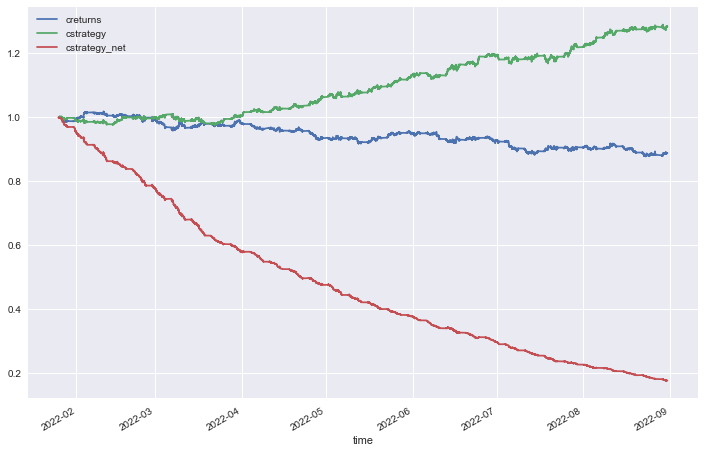

In [43]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

In [44]:
test

,close,returns,dir,sma,bol1,bol2,min,max,mom,vol,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,bol1_lag_1,bol1_lag_2,bol1_lag_3,bol1_lag_4,bol1_lag_5,bol2_lag_1,bol2_lag_2,bol2_lag_3,bol2_lag_4,bol2_lag_5,min_lag_1,min_lag_2,min_lag_3,min_lag_4,min_lag_5,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,dir_class,pred,strategy,creturns,cstrategy,strategy_net,cstrategy_net
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-25 15:30:00,1.12782,-0.000018,-1.0,0.000039,1.128009,1.126762,-0.000807,0.000177,0.000171,0.000263,1.0,1.0,0.0,1.0,0.0,0.000031,0.000008,-0.000022,-0.000061,-0.000085,1.127994,1.127949,1.127954,1.127977,1.127965,1.126768,1.126782,1.126755,1.126695,1.126686,-0.000825,-0.000319,-0.000293,-0.000630,-0.000266,0.000160,0.000665,0.000692,0.000470,0.000834,0.000103,5.618767e-05,3.548679e-05,1.478242e-05,-1.685346e-04,0.000268,0.000259,0.000262,0.000271,0.000261,0,-1,0.000018,0.999982,1.000018,-0.000032,0.999968
2022-01-25 15:35:00,1.12754,-0.000248,-1.0,0.000038,1.127995,1.126765,-0.000559,0.000426,0.000080,0.000268,0.0,1.0,1.0,0.0,1.0,0.000039,0.000031,0.000008,-0.000022,-0.000061,1.128009,1.127994,1.127949,1.127954,1.127977,1.126762,1.126768,1.126782,1.126755,1.126695,-0.000807,-0.000825,-0.000319,-0.000293,-0.000630,0.000177,0.000160,0.000665,0.000692,0.000470,0.000171,1.034586e-04,5.618767e-05,3.548679e-05,1.478242e-05,0.000263,0.000268,0.000259,0.000262,0.000271,-1,-1,0.000248,0.999734,1.000266,0.000198,1.000166
2022-01-25 15:40:00,1.12744,-0.000089,-1.0,0.000020,1.127912,1.126801,-0.000470,0.000355,-0.000118,0.000261,0.0,0.0,1.0,1.0,0.0,0.000038,0.000039,0.000031,0.000008,-0.000022,1.127995,1.128009,1.127994,1.127949,1.127954,1.126765,1.126762,1.126768,1.126782,1.126755,-0.000559,-0.000807,-0.000825,-0.000319,-0.000293,0.000426,0.000177,0.000160,0.000665,0.000692,0.000080,1.714662e-04,1.034586e-04,5.618767e-05,3.548679e-05,0.000268,0.000263,0.000268,0.000259,0.000262,-1,1,-0.000089,0.999645,1.000177,-0.000139,1.000027
2022-01-25 15:45:00,1.12748,0.000035,1.0,0.000015,1.127896,1.126804,-0.000506,0.000319,-0.000101,0.000252,0.0,0.0,0.0,1.0,1.0,0.000020,0.000038,0.000039,0.000031,0.000008,1.127912,1.127995,1.128009,1.127994,1.127949,1.126801,1.126765,1.126762,1.126768,1.126782,-0.000470,-0.000559,-0.000807,-0.000825,-0.000319,0.000355,0.000426,0.000177,0.000160,0.000665,-0.000118,7.982934e-05,1.714662e-04,1.034586e-04,5.618767e-05,0.000261,0.000268,0.000263,0.000268,0.000259,0,1,0.000035,0.999681,1.000213,-0.000015,1.000013
2022-01-25 15:50:00,1.12783,0.000310,1.0,0.000035,1.127950,1.126799,-0.000816,0.000009,0.000086,0.000248,1.0,0.0,0.0,0.0,1.0,0.000015,0.000020,0.000038,0.000039,0.000031,1.127896,1.127912,1.127995,1.128009,1.127994,1.126804,1.126801,1.126765,1.126762,1.126768,-0.000506,-0.000470,-0.000559,-0.000807,-0.000825,0.000319,0.000355,0.000426,0.000177,0.000160,-0.000101,-1.182410e-04,7.982934e-05,1.714662e-04,1.034586e-04,0.000252,0.000261,0.000268,0.000263,0.000268,1,-1,-0.000310,0.999991,0.999902,-0.000360,0.999652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 23:35:00,1.00218,-0.000140,-1.0,0.000041,1.002333,1.001435,-0.000649,0.000140,0.000013,0.000118,1.0,1.0,1.0,0.0,1.0,0.000017,-0.000015,-0.000052,-0.000090,-0.000131,1.002304,1.002242,1.002202,1.002165,1.002137,1.001421,1.001429,1.001425,1.001419,1.001394,-0.000788,-0.000649,-0.000609,-0.000579,-0.000718,0.000000,0.000000,0.000040,0.000070,0.000000,0.000070,-4.856322e-18,2.328432e-05,7.651402e-05,1.530349e-04,0.000113,0.000111,0.000111,0.000113,0.000113,-1,-1,0.000140,0.888583,1.284132,0.000090,0.177228
2022-08-30 23:40:00,1.00244,0.000259,1.0,0.000066,1.002406,1.001426,-0.000908,0

In [46]:
df.to_pickle("datasets/multiclass_df.pkl")

In [47]:
X_test.to_pickle("datasets/X_test.pkl")
y_test.to_pickle("datasets/y_test.pkl")
z_test.to_pickle("datasets/z_test.pkl")
z_train.to_pickle("datasets/z_train.pkl")
y_test.to_pickle("datasets/y_test.pkl")
y_train.to_pickle("datasets/y_train.pkl")